# EDA of House Prices: Advanced Regression Techniques

@roman avj

27 jan 2024

# Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Get Data

## Read

In [2]:
# read data
df_raw = pd.read_csv('../data/train.csv')

df_raw

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# get info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_raw.isnull().sum().gt(0)

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [5]:
# get null values
df_raw.isnull().sum()[df_raw.isnull().sum().gt(0)]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Notes About Data:

- There are 1460 obs
- There are 80 features + id:
    - NaN values:
        - PoolQC nan is no pool, so can be inputed with 'none'
        - Fence, idem
        - MiscFeature, idem
        - Alley, idem
        - MasVnrType, idem
        - FireplaceQu, idem
        - GarafeType, idem
        - GarageFinish, idem
        - GarageYrBlt, idem
        - BsmtQual, idem
        - BsmtCond, idem
        - BsmtExposure, idem
        - BsmtFinType1, idem

    - Most important features with expert knowledge before looking at the variables prediction power:
        - Year Built:
            - age = TODAY - MAX(YearBuilt, YearRemodAdd)
        - Square feats
            - LotArea
            - built area: GrLivArea
            - Porch area: OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch
        - Sale
            - Time (YrSold)
            - ~Vendor~
            - type (SaleType)
            - saleCondition
        - Location
            - Neighborhood
            - LotConfig
        - Comparable properties price
            - price of other comparable properties
                - bathrooms + HalfBath
                - TotRmsAbvGrd
                - built area
                - lot area
                - year built
                - amenities
        - Luxury features
        - Hight
            - has feet of 1stFlrSF + has feet of 2ndFlrSF
        - Type of property
            - HouseStyle
            - BldgType
            - MSZoning
            - MSSubClass

## Important Features

In [6]:
# get important columns from the notes about data
cols2stay = [
    'Id', 'SalePrice',    
    'YearBuilt', 'YearRemodAdd', 
    'LotArea', 'GrLivArea', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'YrSold', 'MoSold',
    'SaleType', 'SaleCondition', 
    'Neighborhood', 'MSZoning',
    'FullBath',  'HalfBath', 'TotRmsAbvGrd',
    'PoolArea', 'OverallQual', 'OverallCond',
    'HouseStyle', 'BldgType'
]

# df with important columns
df = df_raw[cols2stay].copy()
df

,Id,SalePrice,YearBuilt,YearRemodAdd,LotArea,GrLivArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,...,Neighborhood,MSZoning,FullBath,HalfBath,TotRmsAbvGrd,PoolArea,OverallQual,OverallCond,HouseStyle,BldgType
0,1,208500,2003,2003,8450,1710,61,0,0,0,...,CollgCr,RL,2,1,8,0,7,5,2Story,1Fam
1,2,181500,1976,1976,9600,1262,0,0,0,0,...,Veenker,RL,2,0,6,0,6,8,1Story,1Fam
2,3,223500,2001,2002,11250,1786,42,0,0,0,...,CollgCr,RL,2,1,6,0,7,5,2Story,1Fam
3,4,140000,1915,1970,9550,1717,35,272,0,0,...,Crawfor,RL,1,0,7,0,7,5,2Story,1Fam
4,5,250000,2000,2000,14260,2198,84,0,0,0,...,NoRidge,RL,2,1,9,0,8,5,2Story,1Fam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,175000,1999,2000,7917,1647,40,0,0,0,...,Gilbert,RL,2,1,7,0,6,5,2Story,1Fam
1456,1457,210000,1978,1988,13175,2073,0,0,0,0,...,NWAmes,RL,2,0,7,0,6,6,1Story,1Fam
1457,1458,266500,1941,2006,9042,2340,60,0,0,0,...,Crawfor,RL,2,0,9,0,7,9,2Story,1Fam
1458,1459,142125,1950,1996,9717,1078,0,112,0,0,...,NAmes,RL,1,0,5,0,5,6,1Story,1Fam


In [7]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   SalePrice      1460 non-null   int64 
 2   YearBuilt      1460 non-null   int64 
 3   YearRemodAdd   1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   GrLivArea      1460 non-null   int64 
 6   OpenPorchSF    1460 non-null   int64 
 7   EnclosedPorch  1460 non-null   int64 
 8   3SsnPorch      1460 non-null   int64 
 9   ScreenPorch    1460 non-null   int64 
 10  YrSold         1460 non-null   int64 
 11  MoSold         1460 non-null   int64 
 12  SaleType       1460 non-null   object
 13  SaleCondition  1460 non-null   object
 14  Neighborhood   1460 non-null   object
 15  MSZoning       1460 non-null   object
 16  FullBath       1460 non-null   int64 
 17  HalfBath       1460 non-null   int64 
 18  TotRmsAbvGrd   1460 non-null

In [8]:
# get null values
df.isnull().sum()[df.isnull().sum().gt(0)]

Series([], dtype: int64)

# Wrangle Data

In [9]:
df['YearRemodAdd'].max()

2010

In [10]:
# current age
current_year = df['YearRemodAdd'].max()
df['CurrentAge'] = current_year - (np.maximum(df['YearBuilt'], df['YearRemodAdd']))
df['CurrentAge'].describe()

count    1460.000000
mean       25.134247
std        20.645407
min         0.000000
25%         6.000000
50%        16.000000
75%        43.000000
max        60.000000
Name: CurrentAge, dtype: float64

In [11]:
# is renovated
df['IsRenovated'] = df['YearBuilt'].lt(df['YearRemodAdd']).astype(int)
df['IsRenovated'].describe()

count    1460.000000
mean        0.476712
std         0.499629
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: IsRenovated, dtype: float64

In [12]:
# porch area
df['PorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df['PorchArea'].describe()

count    1460.000000
mean       87.084932
std       105.190364
min         0.000000
25%         0.000000
50%        48.000000
75%       136.000000
max      1027.000000
Name: PorchArea, dtype: float64

In [13]:
# total baths
df['TotalBaths'] = df['FullBath'] + df['HalfBath']
df['TotalBaths'].describe()

count    1460.000000
mean        1.947945
std         0.794965
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: TotalBaths, dtype: float64

In [14]:
# has pool
df['HasPool'] = df['PoolArea'].gt(0).astype(int)
df['HasPool'].describe()

count    1460.000000
mean        0.004795
std         0.069100
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: HasPool, dtype: float64

In [15]:
# sales in hundred thousands
df['SalePrice'] = df['SalePrice'].div(1e+5)

In [16]:
# again get with important columns
cols2stay = [
    'Id', 'SalePrice',  
    'CurrentAge', 'IsRenovated',
    'LotArea', 'GrLivArea', 'PorchArea',
    'TotRmsAbvGrd', 'TotalBaths', 'HasPool',
    'SaleType', 'SaleCondition', 
    'Neighborhood', 'MSZoning',
    'OverallQual', 'OverallCond', 
    'HouseStyle', 'BldgType', 'YrSold', 'MoSold'
]
df = df[cols2stay].copy()
df

,Id,SalePrice,CurrentAge,IsRenovated,LotArea,GrLivArea,PorchArea,TotRmsAbvGrd,TotalBaths,HasPool,SaleType,SaleCondition,Neighborhood,MSZoning,OverallQual,OverallCond,HouseStyle,BldgType,YrSold,MoSold
0,1,2.08500,7,0,8450,1710,61,8,3,0,WD,Normal,CollgCr,RL,7,5,2Story,1Fam,2008,2
1,2,1.81500,34,0,9600,1262,0,6,2,0,WD,Normal,Veenker,RL,6,8,1Story,1Fam,2007,5
2,3,2.23500,8,1,11250,1786,42,6,3,0,WD,Normal,CollgCr,RL,7,5,2Story,1Fam,2008,9
3,4,1.40000,40,1,9550,1717,307,7,1,0,WD,Abnorml,Crawfor,RL,7,5,2Story,1Fam,2006,2
4,5,2.50000,10,0,14260,2198,84,9,3,0,WD,Normal,NoRidge,RL,8,5,2Story,1Fam,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,1.75000,10,1,7917,1647,40,7,3,0,WD,Normal,Gilbert,RL,6,5,2Story,1Fam,2007,8
1456,1457,2.10000,22,1,13175,2073,0,7,2,0,WD,Normal,NWAmes,RL,6,6,1Story,1Fam,2010,2
1457,1458,2.66500,4,1,9042,2340,60,9,2,0,WD,Normal,Crawfor,RL,7,9,2Story,1Fam,2010,5
1458,1459,1.42125,14,1,9717,1078,112,5,1,0,WD,Normal,NAmes,RL,5,6,1Story,1Fam,2010,4


# EDA

## Objective Variable: SalePrice

Text(1.64, 100, 'Median: 1.63')

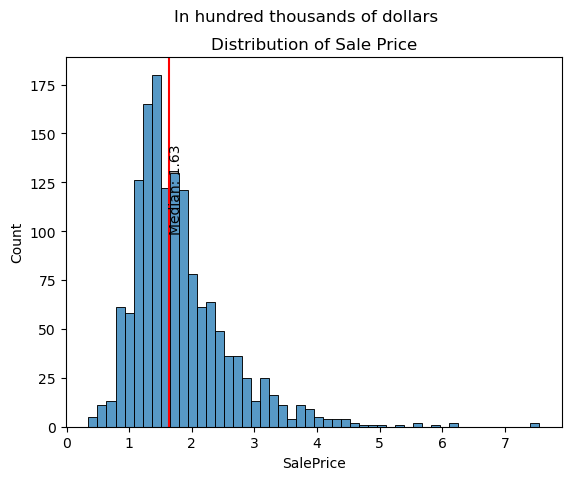

In [17]:
# plot distribution of sale price using seaborn
sns.histplot(data=df, x='SalePrice', bins=50)

# titles
plt.title('Distribution of Sale Price')
# subtitle
plt.suptitle('In hundred thousands of dollars')

# add median line with text
median = df['SalePrice'].median()
plt.axvline(median, color='red')
plt.text(median + 0.01, 100, f'Median: {median:.2f}', rotation=90)




In [18]:
# describe
df['SalePrice'].describe()

count    1460.000000
mean        1.809212
std         0.794425
min         0.349000
25%         1.299750
50%         1.630000
75%         2.140000
max         7.550000
Name: SalePrice, dtype: float64

price is right skewed as expected, if we dont use tree methods, it will be better to normalize it, maybe with a logarithm

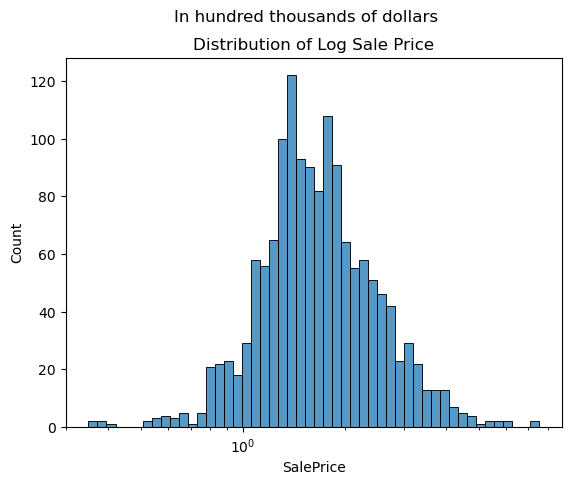

In [19]:
# plot distribution of log of sale price using seaborn, only scale it at the last
sns.histplot(data=df, x='SalePrice', bins=50, log_scale=True)

# titles
plt.title('Distribution of Log Sale Price')
# subtitle
plt.suptitle('In hundred thousands of dollars')

# log x axis
plt.xscale('log')

^^^ data looks more normal now

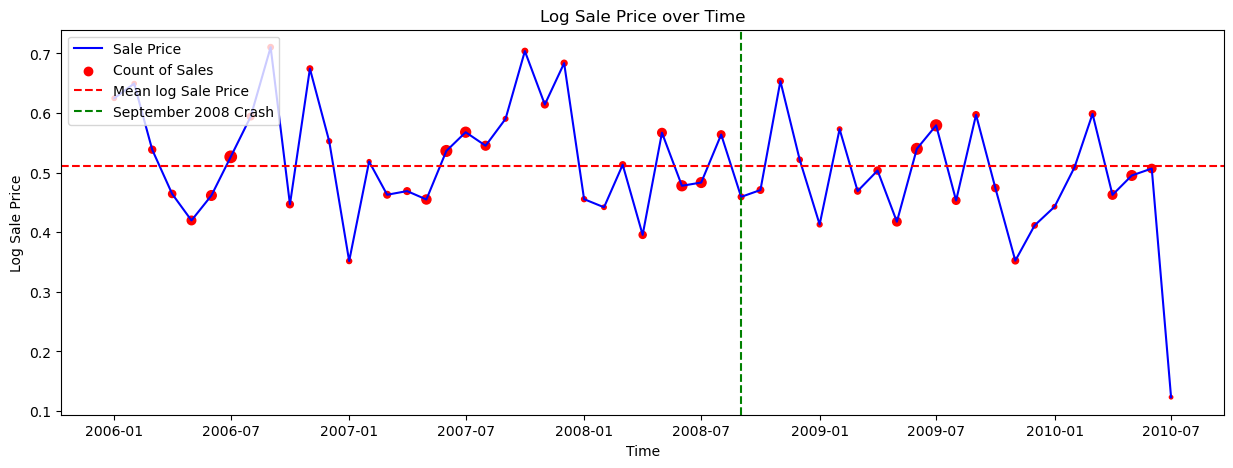

In [20]:
# timeseries plot
df_price_ts = (
    df
    .assign(logprice = lambda x: np.log(x['SalePrice']))
    .groupby(['YrSold', 'MoSold'])
    .agg({'logprice': 'mean', 'Id': 'count'})
    .reset_index()
)
# plot timeseries

# first index as year and month in datetime format
df_price_ts.index = pd.to_datetime(df_price_ts['YrSold'].astype(str) + '-' + df_price_ts['MoSold'].astype(str))

# plot as line & buble 
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_price_ts['logprice'], color='blue', label='Sale Price')
ax.scatter(df_price_ts.index, df_price_ts['logprice'], s=df_price_ts['Id'], color='red', label='Count of Sales')
ax.set_xlabel('Time')
ax.set_ylabel('Log Sale Price')
ax.set_title('Log Sale Price over Time')
# add median line
ax.axhline(df_price_ts['logprice'].mean(), color='red', linestyle='--', label='Mean log Sale Price')
# add september 2008 line
ax.axvline(pd.to_datetime('2008-09-01'), color='green', linestyle='--', label='September 2008 Crash')
# add legend
ax.legend(loc='upper left')
plt.show()

^^^ it doesnt look the financial crisis had any effect on the sale price

^^^ as well, the data look stationary

## X's

In [21]:
# general stats
df.drop(columns=['Id', 'SalePrice']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CurrentAge     1460 non-null   int64 
 1   IsRenovated    1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   GrLivArea      1460 non-null   int64 
 4   PorchArea      1460 non-null   int64 
 5   TotRmsAbvGrd   1460 non-null   int64 
 6   TotalBaths     1460 non-null   int64 
 7   HasPool        1460 non-null   int64 
 8   SaleType       1460 non-null   object
 9   SaleCondition  1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  MSZoning       1460 non-null   object
 12  OverallQual    1460 non-null   int64 
 13  OverallCond    1460 non-null   int64 
 14  HouseStyle     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  YrSold         1460 non-null   int64 
 17  MoSold         1460 non-null   int64 
dtypes: int64(12), object(6)
memo

### Numeric

array([[<Axes: title={'center': 'CurrentAge'}>,
        <Axes: title={'center': 'IsRenovated'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'PorchArea'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>],
       [<Axes: title={'center': 'TotalBaths'}>,
        <Axes: title={'center': 'HasPool'}>,
        <Axes: title={'center': 'OverallQual'}>],
       [<Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YrSold'}>,
        <Axes: title={'center': 'MoSold'}>]], dtype=object)

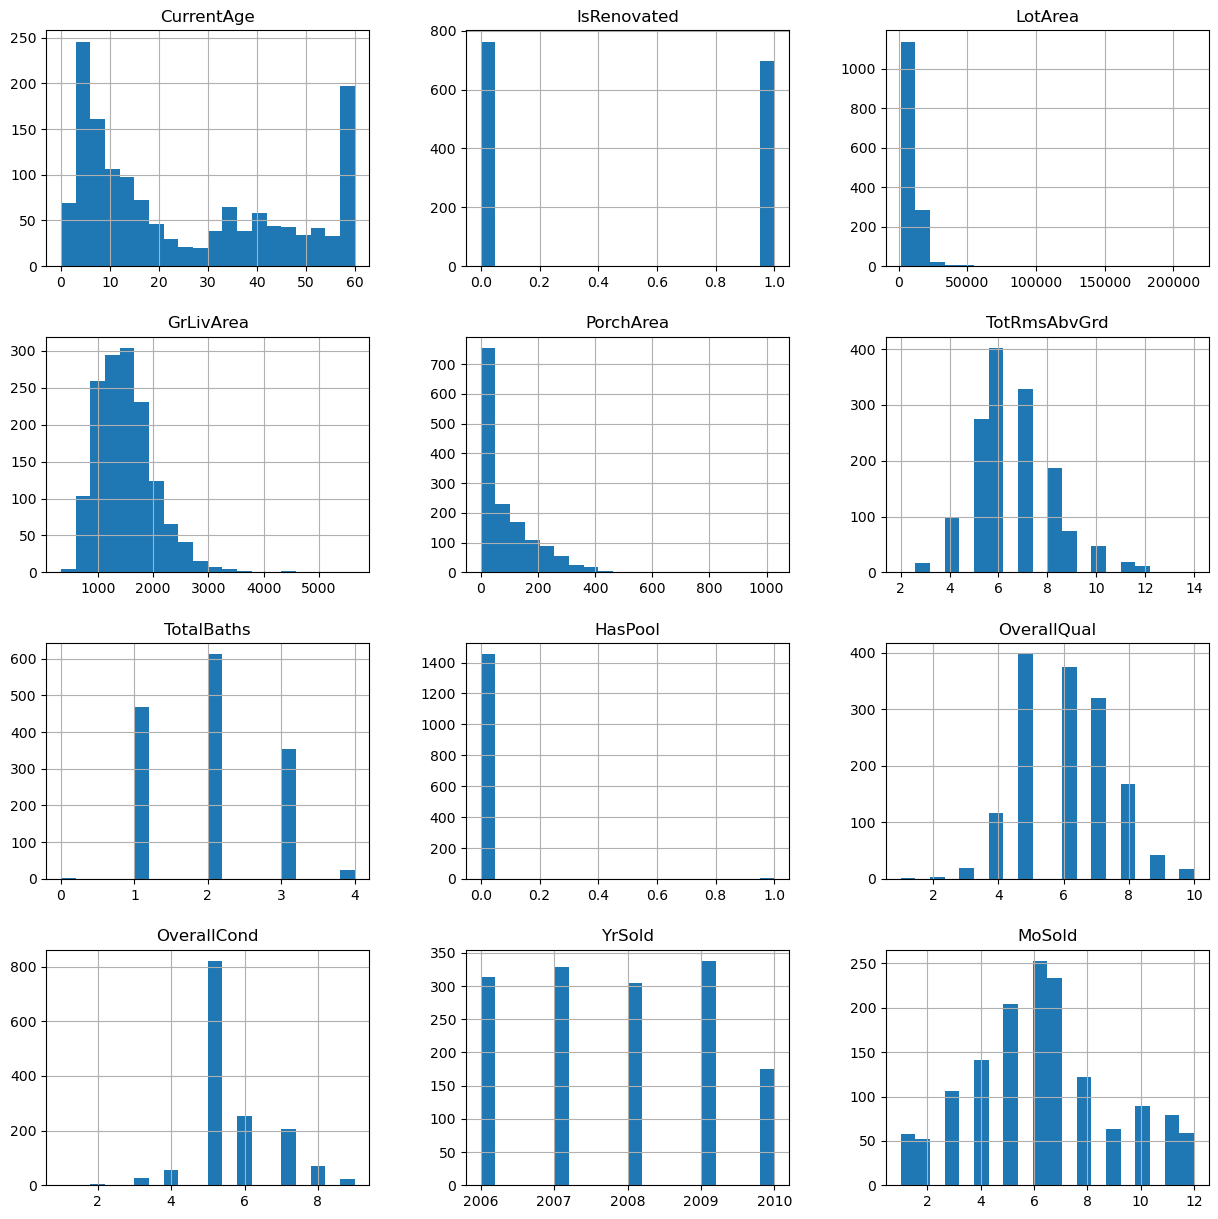

In [22]:
# create histogram for integer columns
df.drop(columns=['Id', 'SalePrice']).hist(figsize=(15, 15), bins=20)

In [23]:
# describe
df.drop(columns=['Id', 'SalePrice']).describe()

,CurrentAge,IsRenovated,LotArea,GrLivArea,PorchArea,TotRmsAbvGrd,TotalBaths,HasPool,OverallQual,OverallCond,YrSold,MoSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,25.134247,0.476712,10516.828082,1515.463699,87.084932,6.517808,1.947945,0.004795,6.099315,5.575342,2007.815753,6.321918
std,20.645407,0.499629,9981.264932,525.480383,105.190364,1.625393,0.794965,0.069100,1.382997,1.112799,1.328095,2.703626
min,0.000000,0.000000,1300.000000,334.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2006.000000,1.000000
25%,6.000000,0.000000,7553.500000,1129.500000,0.000000,5.000000,1.000000,0.000000,5.000000,5.000000,2007.000000,5.000000
50%,16.000000,0.000000,9478.500000,1464.000000,48.000000,6.000000,2.000000,0.000000,6.000000,5.000000,2008.000000,6.000000
75%,43.000000,1.000000,11601.500000,1776.750000,136.000000,7.000000,3.000000,0.000000,7.000000,6.000000,2009.000000,8.000000
max,60.000000,1.000000,215245.000000,5642.000000,1027.000000,14.000000,4.000000,1.000000,10.000000,9.000000,2010.000000,12.000000


In [24]:
# look 10 biggest lots
df.nlargest(10, 'LotArea')

,Id,SalePrice,CurrentAge,IsRenovated,LotArea,GrLivArea,PorchArea,TotRmsAbvGrd,TotalBaths,HasPool,SaleType,SaleCondition,Neighborhood,MSZoning,OverallQual,OverallCond,HouseStyle,BldgType,YrSold,MoSold
313,314,3.7500,45,0,215245,2036,0,8,2,0,WD,Normal,Timber,RL,7,5,1Story,1Fam,2009,6
335,336,2.2895,45,0,164660,1786,0,7,2,0,WD,Normal,Timber,RL,5,6,1.5Fin,2fmCon,2008,8
249,250,2.7700,4,1,159000,2144,98,7,2,0,WD,Normal,ClearCr,RL,6,7,1.5Fin,1Fam,2007,6
706,707,3.0200,8,1,115149,1824,48,5,2,0,WD,Normal,ClearCr,RL,7,5,1Story,1Fam,2007,6
451,452,2.8000,35,0,70761,1533,54,5,2,0,WD,Normal,ClearCr,RL,7,5,1Story,1Fam,2006,12
1298,1299,1.6000,2,0,63887,5642,292,12,3,1,New,Partial,Edwards,RL,10,5,2Story,1Fam,2008,1
1396,1397,1.6000,60,1,57200,1687,50,7,1,0,WD,Normal,Timber,RL,5,5,1Story,1Fam,2010,6
769,770,5.3800,7,0,53504,3279,246,12,4,0,WD,Normal,StoneBr,RL,8,5,2Story,1Fam,2010,6
457,458,2.5600,16,1,53227,1663,137,6,1,0,WD,Normal,ClearCr,RL,4,6,1Story,1Fam,2008,3
384,385,2.4000,18,0,53107,1953,231,9,3,0,WD,Normal,ClearCr,RL,6,5,2Story,1Fam,2007,6


In [25]:
# look 5 biggest PorchArea
df.nlargest(5, 'PorchArea')

,Id,SalePrice,CurrentAge,IsRenovated,LotArea,GrLivArea,PorchArea,TotRmsAbvGrd,TotalBaths,HasPool,SaleType,SaleCondition,Neighborhood,MSZoning,OverallQual,OverallCond,HouseStyle,BldgType,YrSold,MoSold
1328,1329,2.560,60,1,10440,2792,1027,8,2,0,WD,Normal,OldTown,RM,6,7,1.5Fin,1Fam,2008,6
854,855,1.700,36,1,17920,1779,730,6,2,0,WD,Abnorml,Sawyer,RL,5,4,1Story,1Fam,2006,7
185,186,4.750,17,1,22950,3608,670,12,3,0,WD,Normal,OldTown,RM,10,9,2.5Fin,1Fam,2006,6
495,496,0.349,60,1,7879,720,638,4,1,0,WD,Abnorml,IDOTRR,C (all),4,5,1Story,1Fam,2009,11
197,198,2.350,20,1,25419,3112,568,8,2,1,WD,Abnorml,NAmes,RL,8,4,2Story,1Fam,2006,3


In [26]:
# count how many properties without baths
df['TotalBaths'].value_counts(dropna=False)

TotalBaths
2    612
1    469
3    353
4     23
0      3
Name: count, dtype: int64

some possible outliers:

- current age of 60 years, there are a lot
- lot area of 215K sqft
- porch area of 1000 sqft
- no baths

the business decision is to drop
- biggest lot area
- biggest porch area
- no baths

some transformations:
- lot area: to thousands
- grlivarea: to thousands

#### drop values

In [27]:
# drop properties without baths
df = df[df['TotalBaths'].gt(0)]
# drop biggest lot
df = df[df['LotArea'].lt(df['LotArea'].max())]
# drop biggest porch area
df = df[df['PorchArea'].lt(df['PorchArea'].max())]

# shape
df.shape

(1455, 20)

#### transform to thousands


In [28]:
 # transform
df['LotArea'] = df['LotArea'].div(1e+3)
df['GrLivArea'] = df['GrLivArea'].div(1e+3)

array([[<Axes: title={'center': 'CurrentAge'}>,
        <Axes: title={'center': 'IsRenovated'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'PorchArea'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>],
       [<Axes: title={'center': 'TotalBaths'}>,
        <Axes: title={'center': 'HasPool'}>,
        <Axes: title={'center': 'OverallQual'}>],
       [<Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YrSold'}>,
        <Axes: title={'center': 'MoSold'}>]], dtype=object)

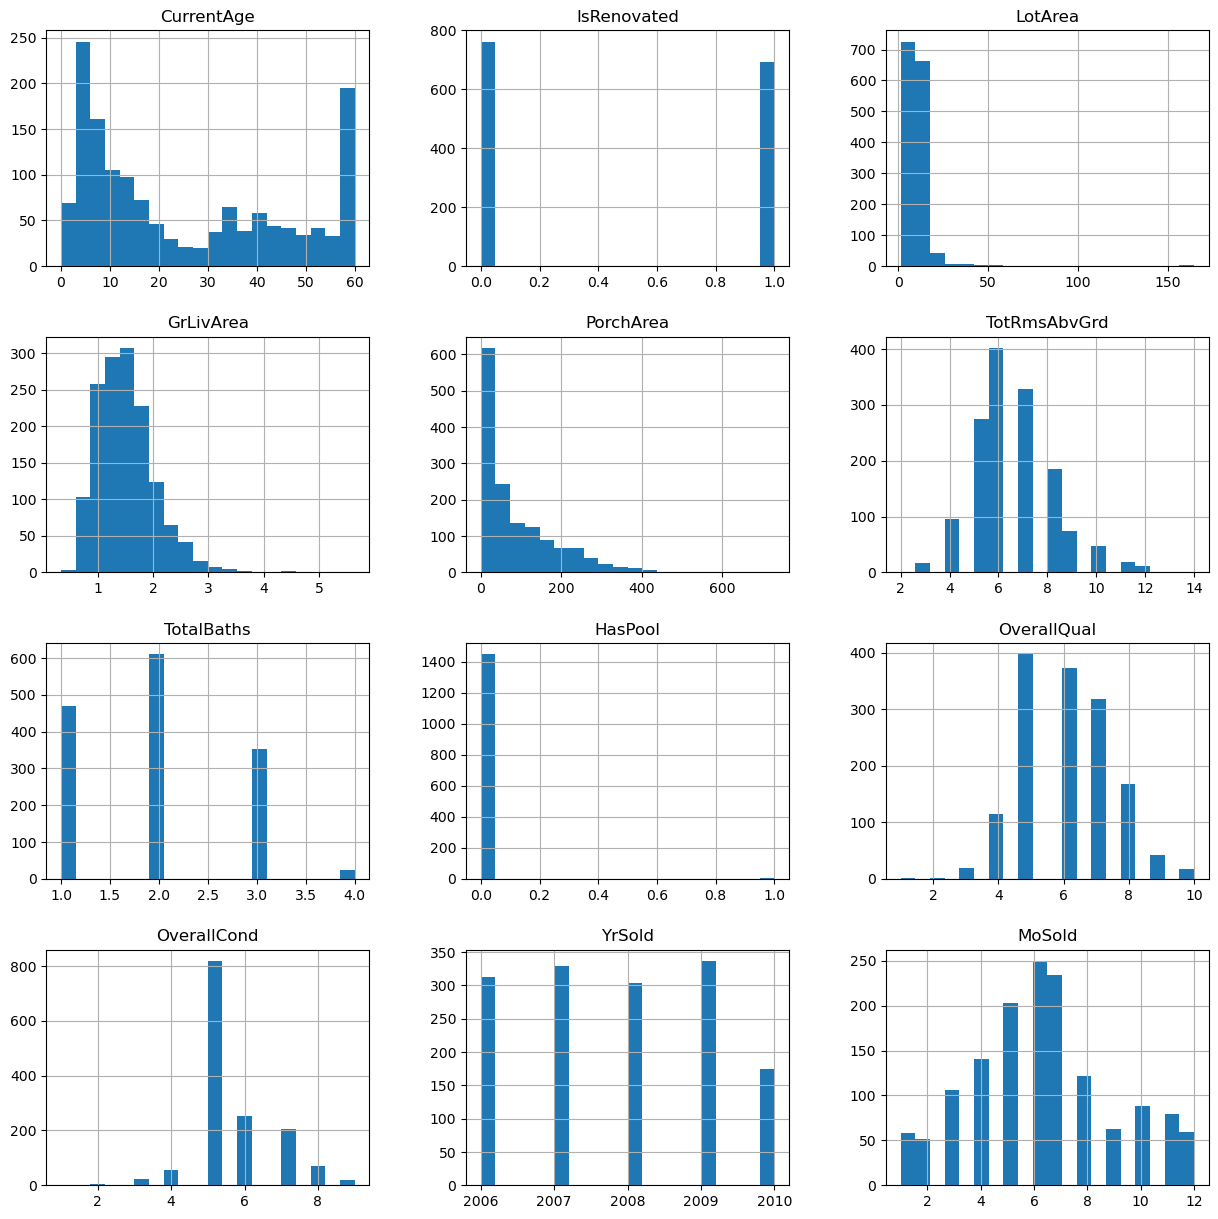

In [29]:
# create histogram for integer columns
df.drop(columns=['Id', 'SalePrice']).hist(figsize=(15, 15), bins=20)

#### Correlation matrix

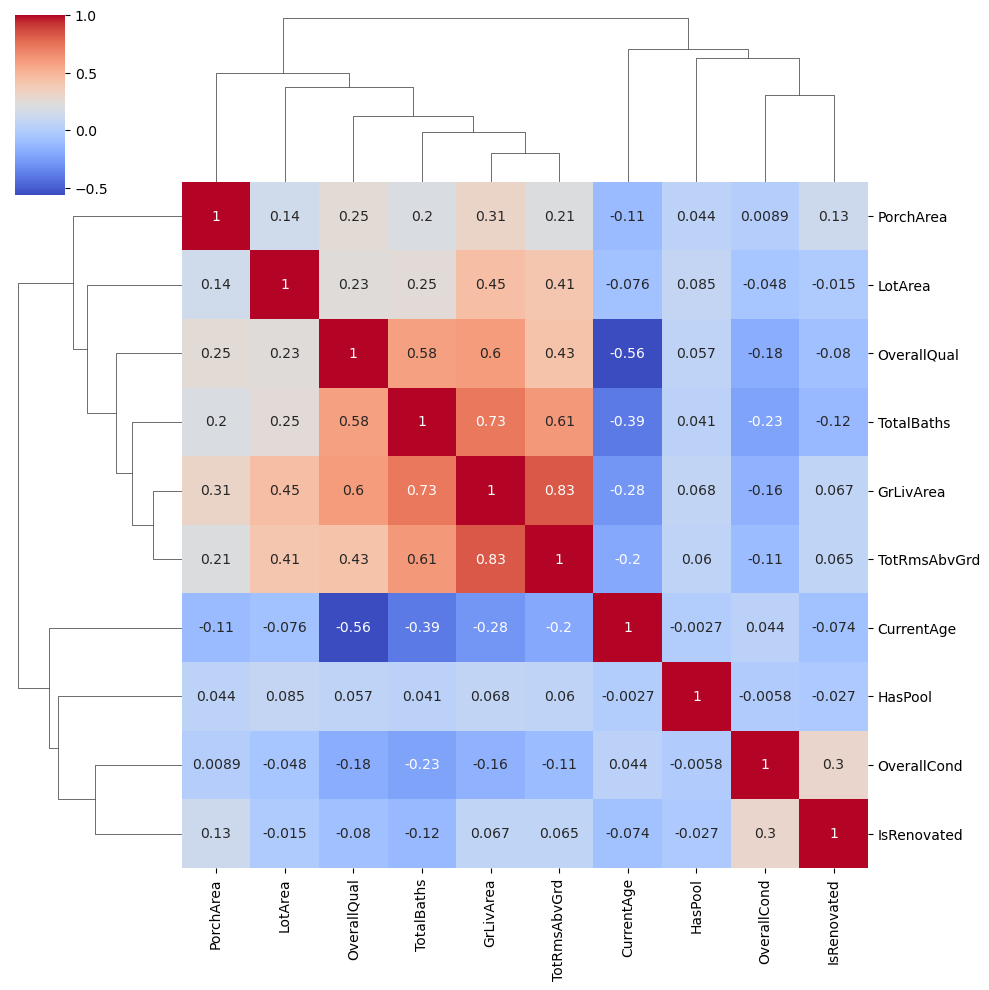

In [30]:
# correlation matrix using clustermap
colsnumeric = [
    'CurrentAge',
    'LotArea', 'GrLivArea', 'PorchArea',
    'TotRmsAbvGrd', 'TotalBaths', 'HasPool',
    'OverallQual', 'OverallCond', 'IsRenovated'
]
# correlation matrix
corr = df[colsnumeric].corr(method='spearman')
# plot with gradient colors
sns.clustermap(corr, annot=True, cmap='coolwarm')


by the plot, there can be some redundant variables like:

- GrLivArea and TotRmsAbvGrd
- GrLivArea and baths 
(maybe delete GrLivArea and left the other two because they are less correlated with others)
- also, overallqual is highly correlated with GrLivArea and baths and TotRmsAbvGrd and Current age, so it can be deleted
- There is not enough data about pools
- stranfe that overall quality is not correlated with overall condition


### Categorical variables


In [31]:
# categorical columns
cat_cols = [
    'SaleType', 'SaleCondition', 
    'Neighborhood', 'MSZoning',
    'HouseStyle', 'BldgType'
]

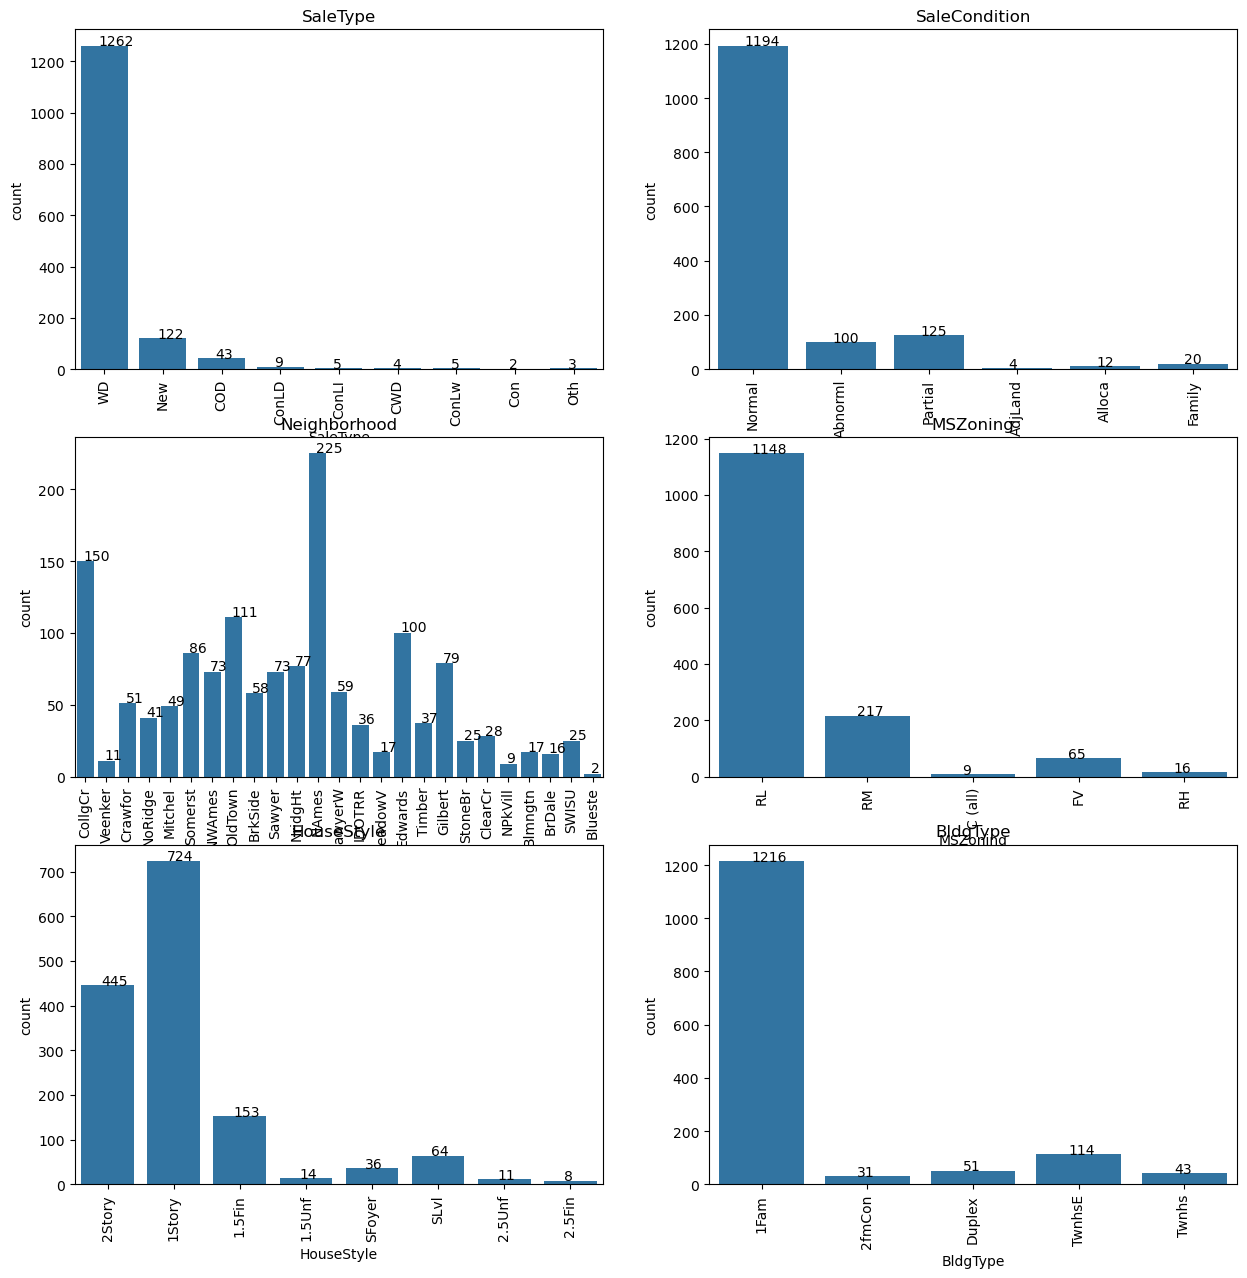

In [32]:
# plot categorical columns with separtion between plots
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

for i, col in enumerate(cat_cols):
    # countplot with counts
    sns.countplot(data=df, x=col, ax=ax[i//2][i%2])
    # add text of counts
    for p in ax[i//2][i%2].patches:
        ax[i//2][i%2].annotate(f'{p.get_height():.0f}', (p.get_x() + 0.3, p.get_height() + 1))

    ax[i//2][i%2].set_title(col)
    # x ticks rotation
    ax[i//2][i%2].tick_params(axis='x', rotation=90)

some possible underfits:

- saletypes like conld, conli, cwd, conlw, con and others, ONLY focus on WD and New
- salecondition like adjland and alcoa
- neighborhood like blueste
- mzoning only residential
- house style like 2.5fin, 2.5unf, 1.5unf
    can be grouped on finished and unfished, as well as 1, 1.5, 2, 2.5 and S
    with sublevels of finished and unfinished
- a lot of neighborhoods with low counts, maybe delete them
- maybe get rid of all sale conditions except normal and partial
- get rid of court officcer

In [33]:
# susbset by sale type
df = df.query('SaleType in ["WD", "New"]')
# subset by sale condition
df = df.query('SaleCondition in ["Normal", "Partial"]')
# subset by mszoning
df = df.query('MSZoning in ["RL", "RM", "RP", "RH"]')

# get shape
df.shape

(1218, 20)

transform housetyle

In [34]:
# type of story
df['Story'] = np.select(
    [
        df['HouseStyle'].str.contains('1Story'),
        df['HouseStyle'].str.contains('1.5Fin'),
        df['HouseStyle'].str.contains('1.5Unf'),
        df['HouseStyle'].str.contains('2Story'),
        df['HouseStyle'].str.contains('2.5Fin'),
        df['HouseStyle'].str.contains('2.5Unf'),
        df['HouseStyle'].str.contains('SFoyer'),
        df['HouseStyle'].str.contains('SLvl')
    ],
    [
        'one',
        'one_and_half',
        'one_and_half',
        'two',
        'two_and_half',
        'two_and_half',
        'split',
        'split'
    ]
)

# finish or unfinished
df['StoryFinish'] = np.where(df['HouseStyle'].str.contains('Unf'), 'unfinished', 'finished')

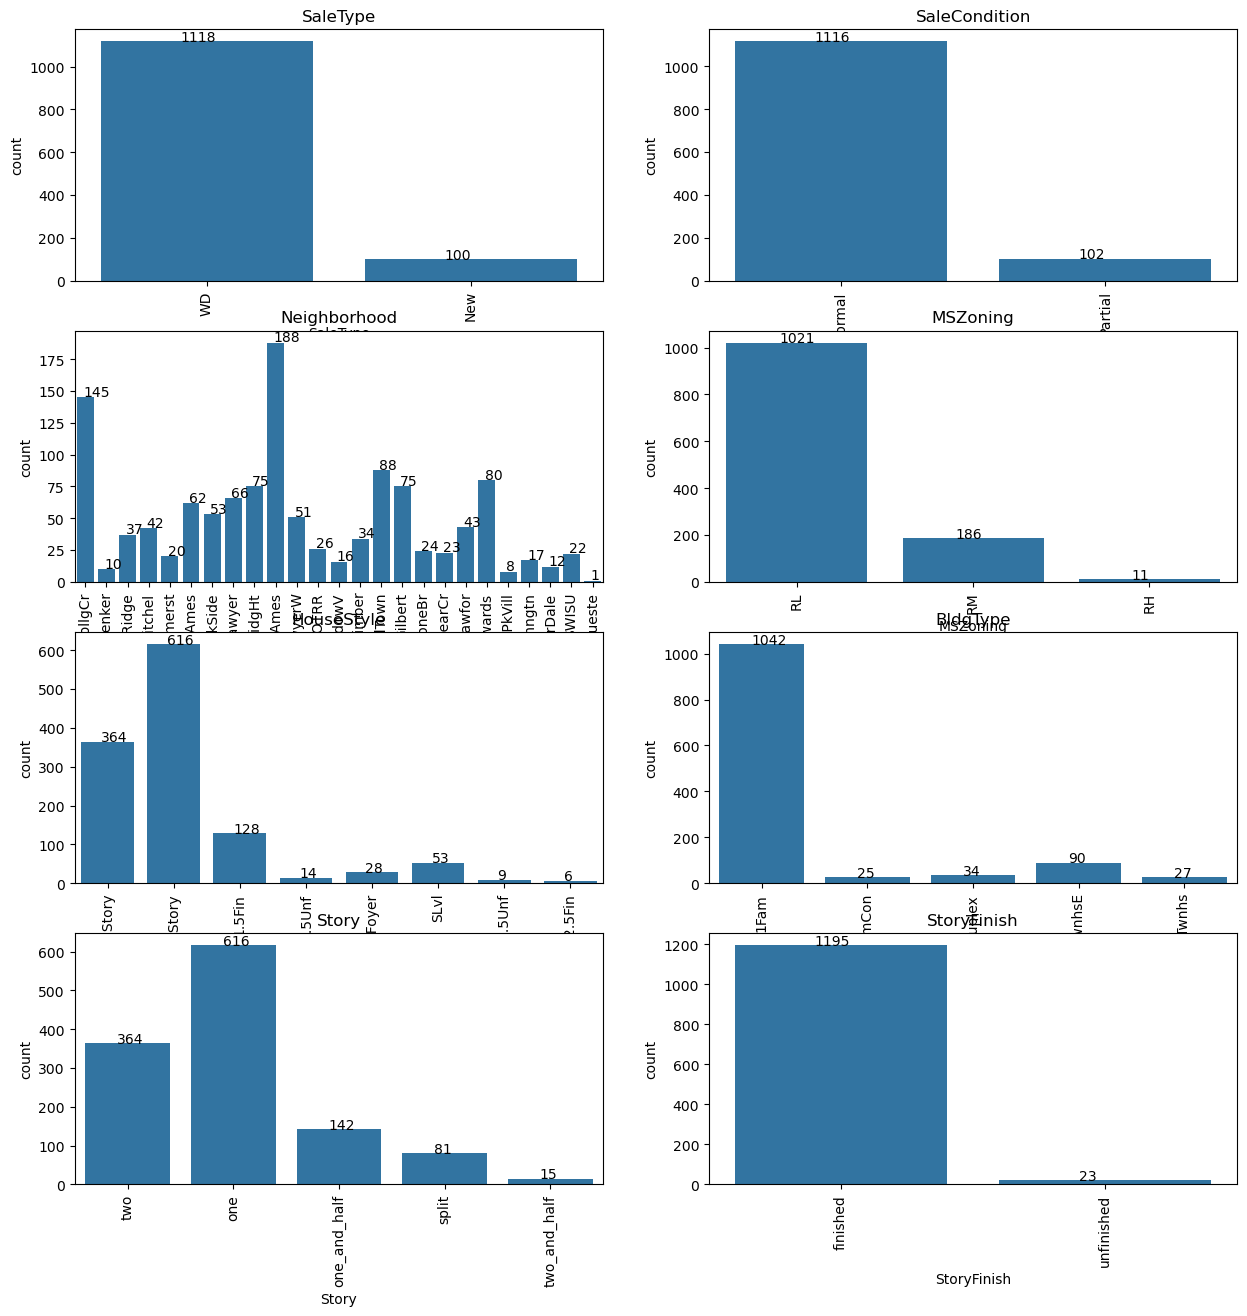

In [35]:
# list categorical columns
cat_cols = [
    'SaleType', 'SaleCondition', 
    'Neighborhood', 'MSZoning',
    'HouseStyle', 'BldgType',
    'Story', 'StoryFinish'
]

# again plot categorical columns with separtion between plots
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

for i, col in enumerate(cat_cols):
    # countplot with counts
    sns.countplot(data=df, x=col, ax=ax[i//2][i%2])
    # add text of counts
    for p in ax[i//2][i%2].patches:
        ax[i//2][i%2].annotate(f'{p.get_height():.0f}', (p.get_x() + 0.3, p.get_height() + 1))

    ax[i//2][i%2].set_title(col)
    # x ticks rotation
    ax[i//2][i%2].tick_params(axis='x', rotation=90)

### Time variables

Text(0, 0.5, 'Count of Sales')

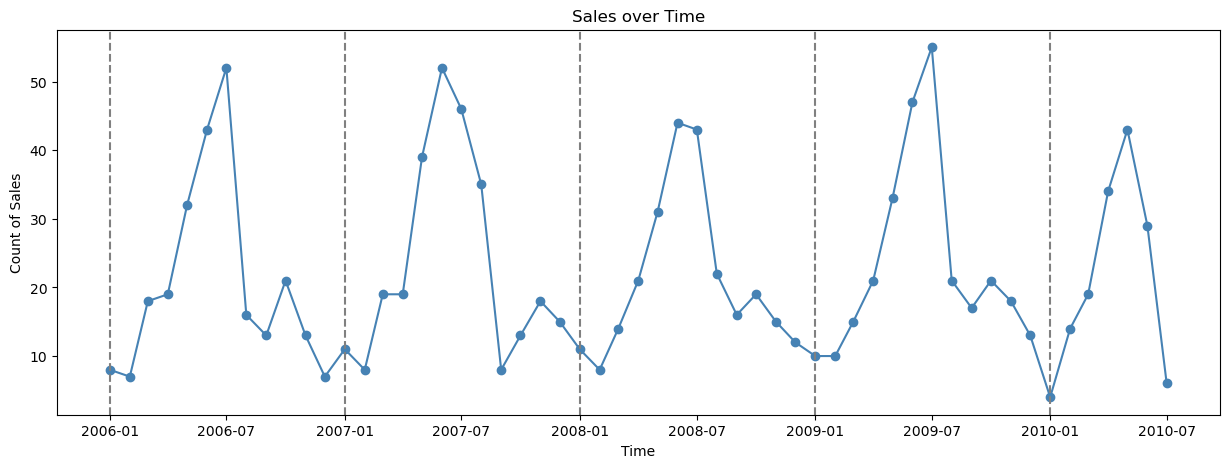

In [36]:
# time series of sales
df_ts = (
    df
    .groupby(['YrSold', 'MoSold'])
    .agg({'Id': 'count'})
    .reset_index()
)

# plot timeseries
# first index as year and month in datetime format
df_ts.index = pd.to_datetime(df_ts['YrSold'].astype(str) + '-' + df_ts['MoSold'].astype(str))

# plot as lines
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_ts['Id'], color='steelblue')
# add points
ax.scatter(df_ts.index, df_ts['Id'], color='steelblue')
# add hline each year
for year in df_ts['YrSold'].unique():
    ax.axvline(pd.to_datetime(f'{year}-01-01'), color='gray', linestyle='--')

# add title
ax.set_title('Sales over Time')
# add x and y labels
ax.set_xlabel('Time')
ax.set_ylabel('Count of Sales')



/Users/ravj/opt/anaconda3/envs/academic-producto/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


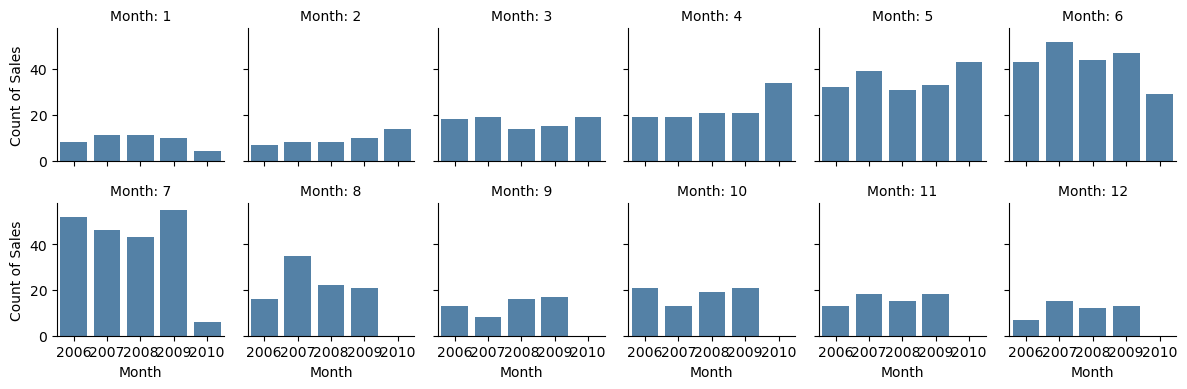

In [37]:
# plot each month the number of sales facet grid by year
g = sns.FacetGrid(df_ts.reset_index(), col='MoSold', col_wrap=6, height=2)
g.map(sns.barplot, 'YrSold', 'Id', color='steelblue')
g.set_axis_labels('Month', 'Count of Sales')
g.set_titles('Month: {col_name}')
plt.show()


# Y vs X

## Numeric

In [38]:
# get correlations between numeric columns and sale price
colsnumeric = [
    'CurrentAge',
    'LotArea', 'GrLivArea', 'PorchArea',
    'TotRmsAbvGrd', 'TotalBaths',
    'OverallQual', 'OverallCond'
]

# correlation between numeric columns and sale price
df[colsnumeric + ['SalePrice']].corr(method='spearman')['SalePrice'].sort_values(ascending=False, key=np.abs)


SalePrice       1.000000
OverallQual     0.814098
GrLivArea       0.742919
TotalBaths      0.653623
TotRmsAbvGrd    0.563787
CurrentAge     -0.550073
LotArea         0.501779
PorchArea       0.262583
OverallCond    -0.162876
Name: SalePrice, dtype: float64

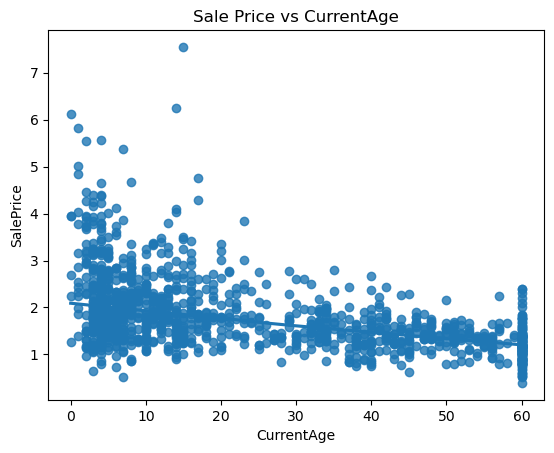

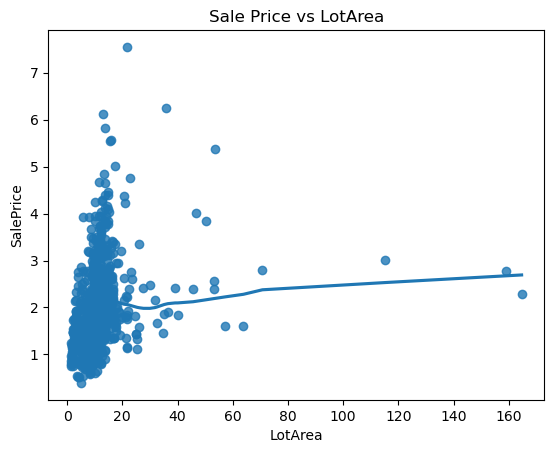

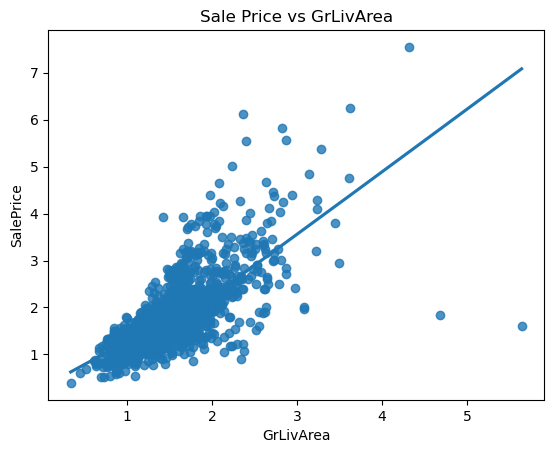

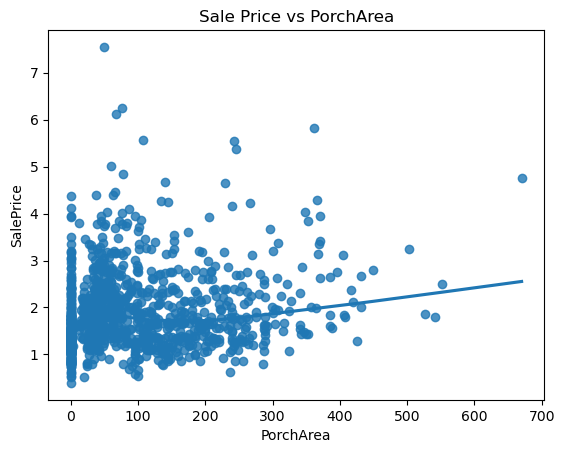

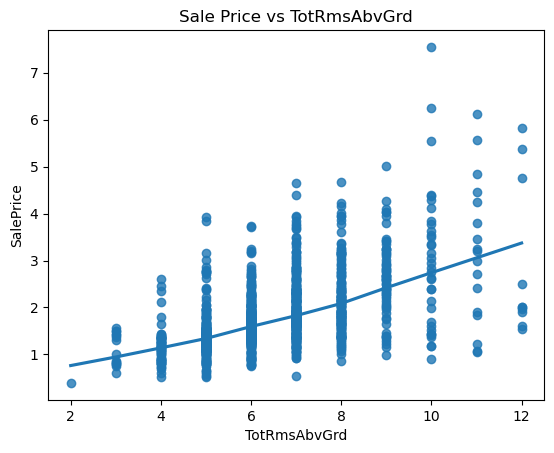

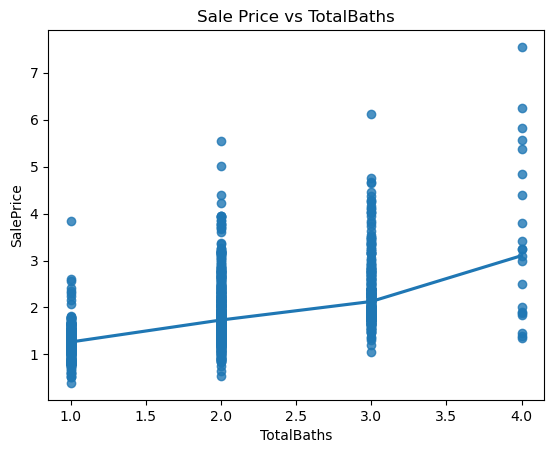

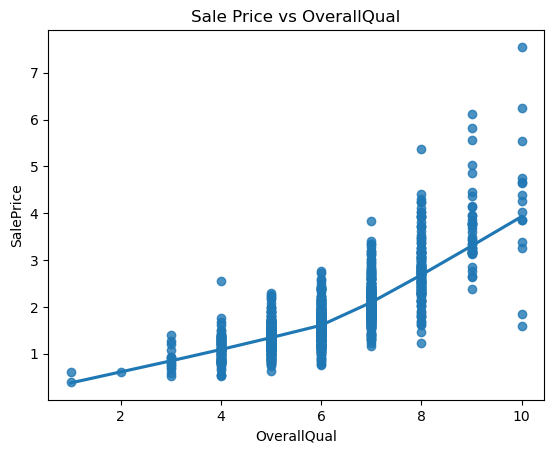

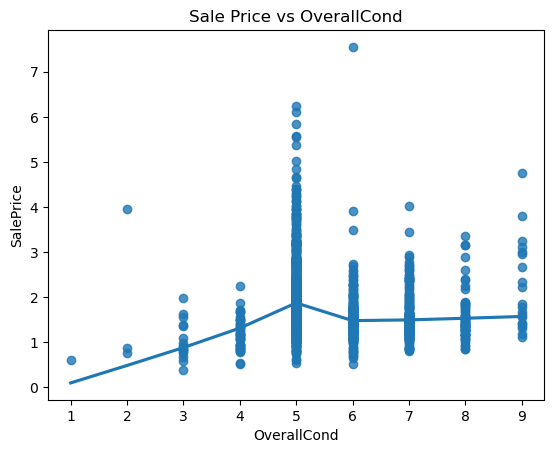

In [39]:
# scatter plots of numeric columns and sale price with lowess
for col in colsnumeric:
    sns.regplot(data=df, x=col, y='SalePrice', lowess=True)
    plt.title(f'Sale Price vs {col}')
    plt.show()



## Categorical

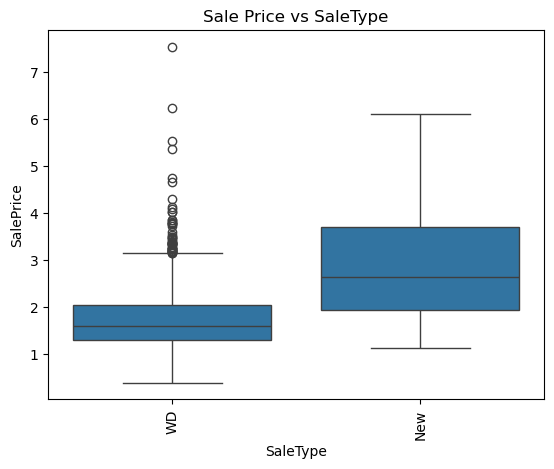

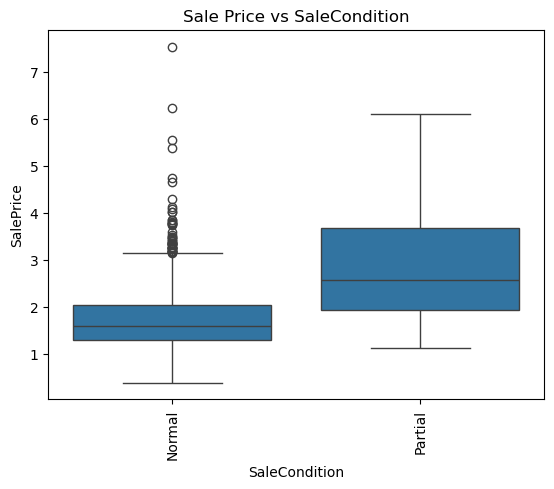

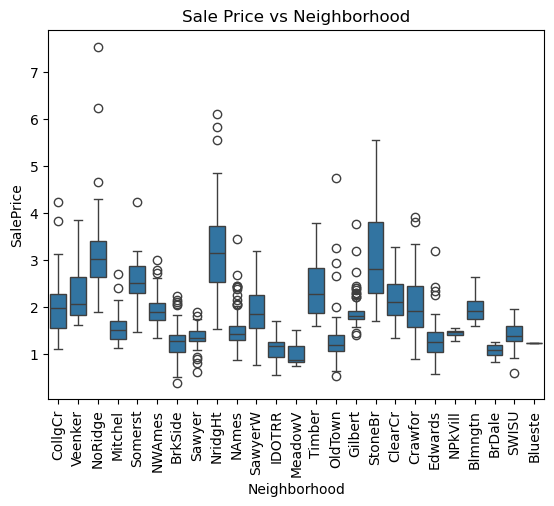

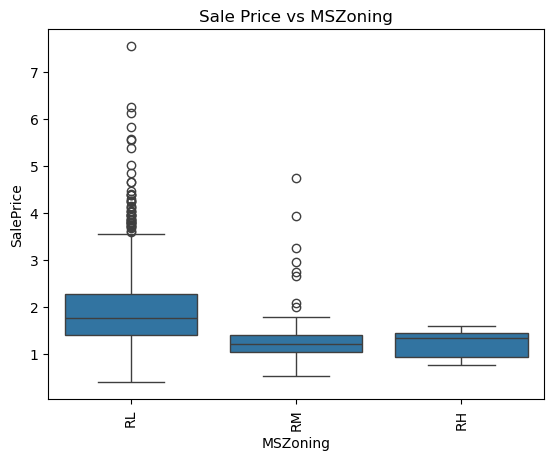

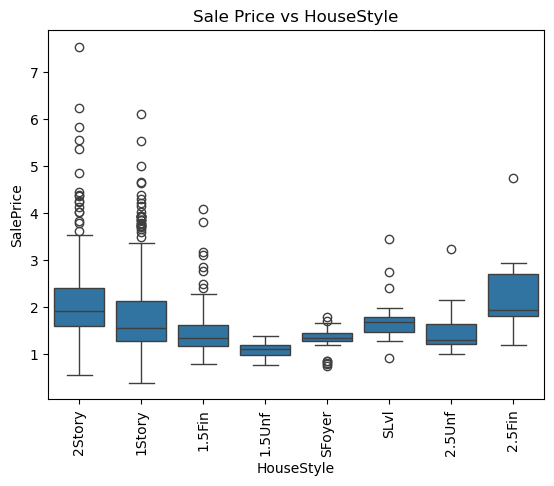

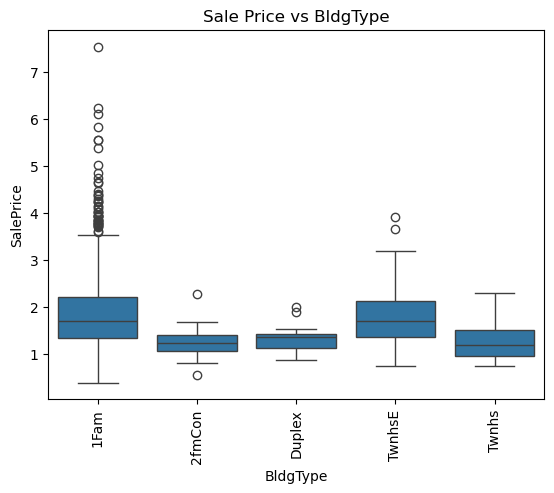

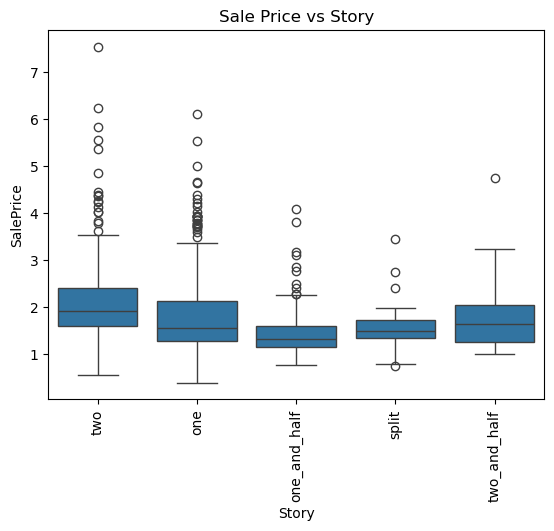

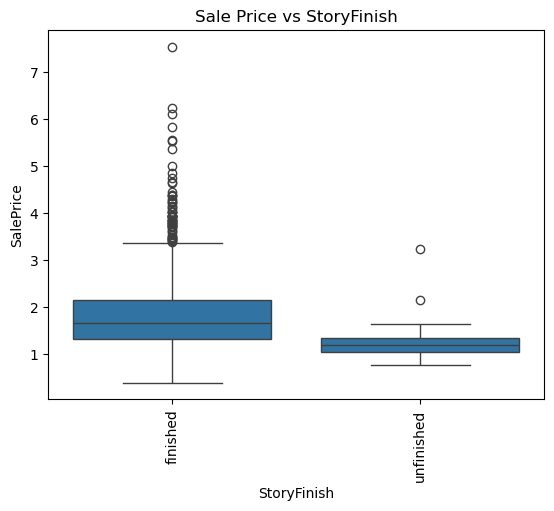

In [40]:
# create boxplots of categorical columns and sale price
for col in cat_cols:
    sns.boxplot(data=df, x=col, y='SalePrice')
    plt.title(f'Sale Price vs {col}')
    plt.xticks(rotation=90)
    plt.show()
    